# Tensorflow Ex-8 Part-4

In [ ]:
import pandas as pd

In [ ]:
diabetes = pd.read_csv("/content/diabetes.csv")

In [ ]:
diabetes.head()

Number_pregnant  Glucose_concentration  Blood_pressure  ...  Age  Class  Group
0                6               0.743719        0.590164  ...   50      1      B
1                1               0.427136        0.540984  ...   31      0      C
2                8               0.919598        0.524590  ...   32      1      B
3                1               0.447236        0.540984  ...   21      0      B
4                0               0.688442        0.327869  ...   33      1      C

[5 rows x 10 columns]

In [ ]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [ ]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [ ]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
diabetes.head()

Number_pregnant  Glucose_concentration  Blood_pressure  ...  Age  Class  Group
0         0.352941               0.743719        0.590164  ...   50      1      B
1         0.058824               0.427136        0.540984  ...   31      0      C
2         0.470588               0.919598        0.524590  ...   32      1      B
3         0.058824               0.447236        0.540984  ...   21      0      B
4         0.000000               0.688442        0.327869  ...   33      1      C

[5 rows x 10 columns]

In [28]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

In [29]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [30]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [31]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [ ]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


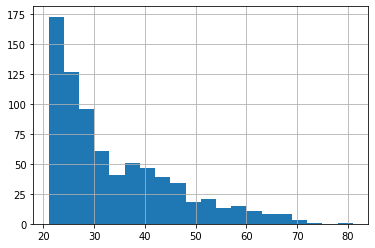

In [33]:
diabetes['Age'].hist(bins=20)

In [34]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [35]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_bucket]

In [ ]:
#Train Test Split

In [36]:
x_data = diabetes.drop('Class',axis=1)
x_data.head()

Number_pregnant  Glucose_concentration  Blood_pressure  ...  Pedigree  Age  Group
0         0.352941               0.743719        0.590164  ...  0.234415   50      B
1         0.058824               0.427136        0.540984  ...  0.116567   31      C
2         0.470588               0.919598        0.524590  ...  0.253629   32      B
3         0.058824               0.447236        0.540984  ...  0.038002   21      B
4         0.000000               0.688442        0.327869  ...  0.943638   33      C

[5 rows x 9 columns]

In [37]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [40]:
X_train.head()

Number_pregnant  Glucose_concentration  ...  Age  Group
218         0.294118               0.427136  ...   32      A
83          0.000000               0.507538  ...   22      A
176         0.352941               0.427136  ...   42      B
53          0.470588               0.884422  ...   58      C
117         0.294118               0.391960  ...   25      D

[5 rows x 9 columns]

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train, batch_size=10,num_epochs=1000,shuffle=True)

In [42]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzmuet1qc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
INF